In [1]:
%matplotlib inline

import os
import yaml

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import astropy.io.fits as pyfits
from astropy.io import fits
from astropy.table import Table

import grizli
import grizli.catalog
from grizli import utils

import pandas as pd
import eazy

print(f'grizli version: {grizli.__version__}')
print(f'eazy-py version: {eazy.__version__}')

Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git
grizli version: 1.11.2
eazy-py version: 0.6.8


### Set field & path
`abell2744clu` = Abell 2744 GLASS + UNCOVER + DD-2756

`gds` = GOODS-South

In [2]:
field = 'gds-grizli-v7.0' 
url_path = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7'

In [3]:
phot = utils.read_catalog(f'{url_path}/{field}_phot.fits')

In [4]:
import eazy.hdf5

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()

root = f'{field}-fix'

self = eazy.hdf5.initialize_from_hdf5(h5file=root+'.eazypy.h5')
self.fit_phoenix_stars()

zout = utils.read_catalog(root+'.eazypy.zout.fits')
self.cat = utils.read_catalog(root+'_phot_apcorr.fits')
cat = self.cat

Read default param file: /home/codespace/.python/current/lib/python3.10/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 52427
f090w_tot_1 f090w_etot_1 (363): jwst_nircam_f090w
f105w_tot_1 f105w_etot_1 (202): hst/wfc3/IR/f105w.dat
f110w_tot_1 f110w_etot_1 (241): hst/wfc3/IR/f110w.dat
f115w_tot_1 f115w_etot_1 (364): jwst_nircam_f115w
f115wn_tot_1 f115wn_etot_1 (309): niriss-f115w
f125w_tot_1 f125w_etot_1 (203): hst/wfc3/IR/f125w.dat
f140w_tot_1 f140w_etot_1 (204): hst/wfc3/IR/f140w.dat
f150w_tot_1 f150w_etot_1 (365): jwst_nircam_f150w
f150wn_tot_1 f150wn_etot_1 (310): niriss-f150w
f160w_tot_1 f160w_etot_1 (205): hst/wfc3/IR/f160w.dat
f182m_tot_1 f182m_etot_1 (370): jwst_nircam_f182m
f200w_tot_1 f200w_etot_1 (366): jwst_nircam_f200w
f200wn_tot_1 f200wn_etot_1 (311): niriss-f200w
f210m_tot_1 f210m_etot_1 (371): jwst_nircam_f210m
f277w_tot_1 f277w_etot_1 (375): jwst_nircam_f277w
f335m_tot_1 f335m_etot_1 (381): jwst_nircam_f335m
f356w_tot_1 f356w_etot_1 (376

294it [00:04, 66.50it/s]


h5: read corr_sfhz_13_bin0_av0.01.fits
h5: read corr_sfhz_13_bin0_av0.25.fits
h5: read corr_sfhz_13_bin0_av0.50.fits
h5: read corr_sfhz_13_bin0_av1.00.fits
h5: read corr_sfhz_13_bin1_av0.01.fits
h5: read corr_sfhz_13_bin1_av0.25.fits
h5: read corr_sfhz_13_bin1_av0.50.fits
h5: read corr_sfhz_13_bin1_av1.00.fits
h5: read corr_sfhz_13_bin2_av0.01.fits
h5: read corr_sfhz_13_bin2_av0.50.fits
h5: read corr_sfhz_13_bin2_av1.00.fits
h5: read corr_sfhz_13_bin3_av0.01.fits
h5: read corr_sfhz_13_bin3_av0.50.fits
h5: read fsps_4590.fits
h5: read j0647agn+torus.fits
fit_best: 23.0 s (n_proc=2,  NOBJ=51146)
phoenix_templates: ./bt-settl_t400-7000_g4.5.fits


Text(0.5, 1.0, 'JWST gds-grizli-v7.0')

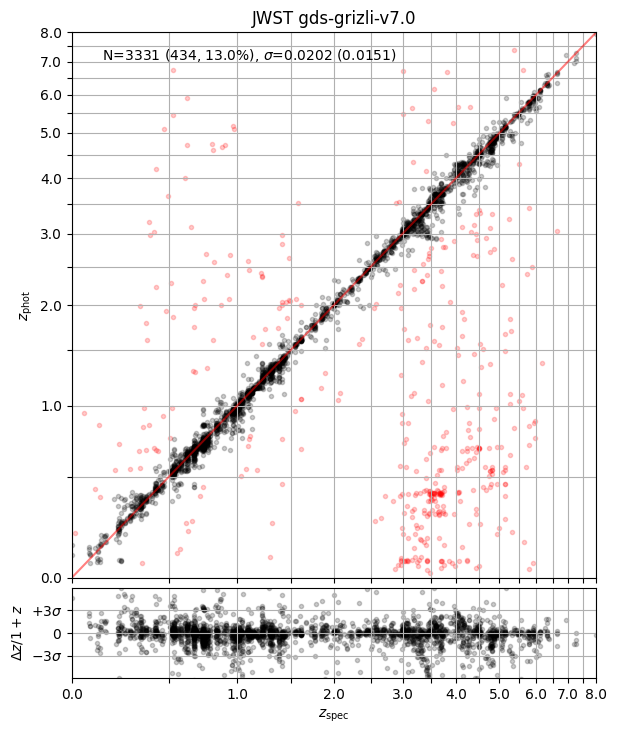

In [5]:
fig = eazy.utils.zphot_zspec(zout['z_phot'], zout['z_spec'], zmax=8)
fig.axes[0].set_title(f'JWST {field}')

(0.0, 8.0)

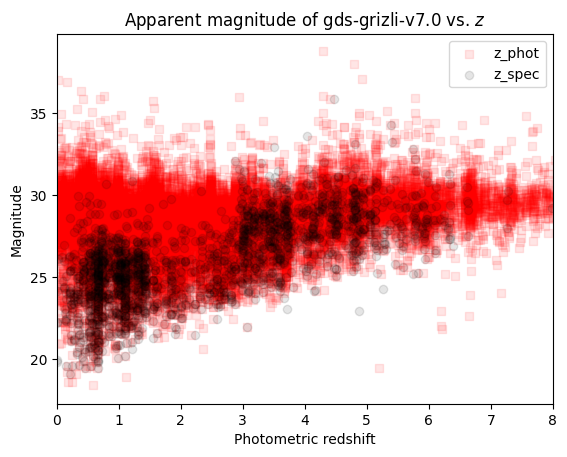

In [6]:
mag_f200 = 23.9 - 2.5*np.log10(phot['f200w-clear_flux_aper_2']) # apparent magnitude using zero point of 23.9

plt.scatter(zout['z_phot'], mag_f200, marker='s', alpha=0.1, label='z_phot', color='red')
plt.scatter(zout['z_spec'], mag_f200, marker='o', alpha=0.1, label='z_spec', color='black')
plt.legend()
plt.ylabel('Magnitude'); plt.xlabel('Photometric redshift'); plt.title(f'Apparent magnitude of {field} vs. $z$')
plt.xlim(0, 8)

In [7]:
np.mean(zout['z_phot'])

2.7583258

(0.0, 6.0)

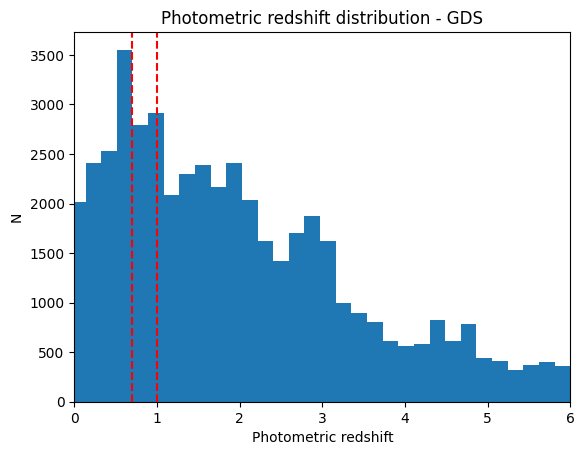

In [16]:
plt.hist(zout['z_phot'], bins=100)
plt.axvline(0.7, linestyle='--', color='red') # peaks
plt.axvline(1, linestyle='--', color='red')
plt.xlabel('Photometric redshift'); plt.ylabel('N'); plt.title('Photometric redshift distribution - GDS')
plt.xlim(0, 6)
## The sources are distributed in a redshift interval z ∈ [0.65−1.53]
## Likelihood that a particular galaxy is a cluster member -> galaxies < 0 and > 7.5 are foreground/background objects?

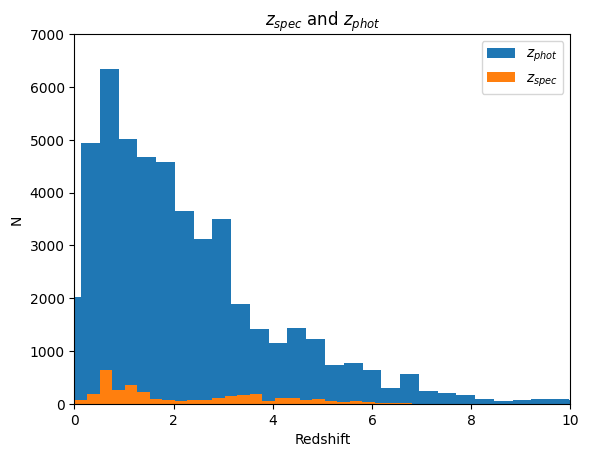

In [35]:
plt.hist(zout['z_phot'], bins=50, label='$z_{phot}$')
plt.hist(zout['z_spec'], bins=50, label='$z_{spec}$')
plt.ylim(0, 7000); plt.xlabel('Redshift'); plt.ylabel('N')
plt.xlim(0,10);
plt.title('$z_{spec}$ and $z_{phot}$')

plt.legend()

## Colour-colour diagrams

In [21]:
_rf = self.rest_frame_fluxes()

Rest-frame filters:
~~~~~~~~~~~~~~~~~~~ 
   0 REST_FRAME/maiz-apellaniz_Johnson_U.res 2006AJ....131.1184M lambda_c= 3.5900e+03 AB-Vega= 0.769 w95=862.3
   1 REST_FRAME/maiz-apellaniz_Johnson_B.res 2006AJ....131.1184M lambda_c= 4.3722e+03 AB-Vega=-0.106 w95=1321.3
   2 REST_FRAME/maiz-apellaniz_Johnson_V.res 2006AJ....131.1184M lambda_c= 5.4794e+03 AB-Vega= 0.002 w95=1369.1
   3 2MASS/J.res lambda_c= 1.2358e+04 AB-Vega= 0.885 w95=2311.1


100%|██████████| 6/6 [10:07<00:00, 101.20s/it]

 ... rest-frame flux: 607.3 s (n_proc=2,  NOBJ=51560)


In [22]:
"""
_rf = (tf,lc,rf)
tf = rf integrated template fluxes (total through a filter)
lc = rf pivot wavelengths (effective wavelength based on filter's transmission properties)
rf = rf fluxes 
"""

_ubvj = _rf
UBVJ = [153,154,155,161]
self.ubvj_tempfilt, self.ubvj_lc, self.ubvj = _ubvj
self.ubvj_f_numbers = UBVJ
        
restU = self.ubvj[:,0,2] # flux density
restB = self.ubvj[:,1,2]
restV = self.ubvj[:,2,2]
restJ = self.ubvj[:,3,2]

UV = -2.5*np.log10(restU/restV) # rest-frame with AB magnitude
VJ = -2.5*np.log10(restV/restJ) 


In [27]:
# Creating a master dataframe of (z, U, V, J) in order to index by redshift
df = pd.DataFrame()

df['z_phot'] = list(zout['z_phot'])
df['U'] = list(restU)
df['V'] = list(restV)
df['J'] = list(restJ)

df.sort_values('z_phot')

,z_phot,U,V,J
0,-1.000000,-99.0,-99.0,-99.0
31943,-1.000000,-99.0,-99.0,-99.0
49909,-1.000000,-99.0,-99.0,-99.0
32001,-1.000000,-99.0,-99.0,-99.0
7181,-1.000000,-99.0,-99.0,-99.0
...,...,...,...,...
43792,17.914907,0.0,0.0,0.0
34503,17.914907,0.0,0.0,0.0
36748,17.914907,0.0,0.0,0.0
42776,17.914907,0.0,0.0,0.0


In [24]:
def UVJ_diagram(df):
    """ For a given dataframe of shape (z, U, V, J), return the minimum
        and maximum z and UV and VJ bands
    """
    min_z = min(df['z_phot'])
    max_z = max(df['z_phot'])
    UV = -2.5*np.log10(df['U']/df['V'])
    VJ = -2.5*np.log10(df['V']/df['J'])
    
    return min_z, max_z, VJ, UV

In [111]:
# Creating dataframes for different ranges of redshift

z1 = df[(df['z_phot'] >= 0.05) & (df['z_phot'] <= 0.35)]
z2 = df[(df['z_phot'] > 0.35) & (df['z_phot'] <= 0.60)]
z3 = df[(df['z_phot'] > 0.60) & (df['z_phot'] <= 0.85)]
z4 = df[(df['z_phot'] > 0.85) & (df['z_phot'] <= 1.15)]
z5 = df[(df['z_phot'] > 1.15) & (df['z_phot'] <= 1.53)]
z6 = df[(df['z_phot'] > 1.53) & (df['z_phot'] <= 2)]
z7 = df[(df['z_phot'] > 2) & (df['z_phot'] <= 2.5)]
z8 = df[(df['z_phot'] > 2.5) & (df['z_phot'] <= 3)]

zs=[z1,z2,z3,z4 ,z5, z6, z7, z8]

c = 0
for z in zs:
    print(len(z))
    c += (len(z))

print(c / len(df) * 100, '%')

4068
4005
4145
4228
4129
5661
5114
4417
68.22248078280275 %


In [112]:
def plot_df_subsets(df_list, cut=''):
    # Subplots for each range of z/mag
    fig, axs = plt.subplots(4, 2, figsize=(8, 10), sharex=True, sharey=True)
    fig.suptitle('UVJ Diagram - Abell 2744' + ' (' + cut + ')')

    for i, variable in enumerate(zs):
        x = i//2; y = i%2 

        axs[x,y].scatter(UVJ_diagram(zs[i])[2], UVJ_diagram(zs[i])[3], alpha=0.05, marker='*') 
        axs[x,y].set_xlim(-0.5, 2.5); axs[x,y].set_ylim(0, 2.5)
        axs[x,y].text(-0.2, 2.2, str(round(UVJ_diagram(zs[i])[0], 2))+' $\leq$ z $\leq$ '+str(round(UVJ_diagram(zs[i])[1], 2)),fontsize=10)
        axs[x,y].set_xlabel('V-J')
        axs[x,y].set_ylabel('U-V')  

        axs[x,y].grid(alpha=0.7)

        axs[x,y].plot([-0.5,0.8],[1.3,1.3],'r',lw=2) # left
        axs[x,y].plot([0.81,1.5],[1.3,1.9],'r',lw=2) # diag
        axs[x,y].plot([1.5,1.5],[1.9,2.5],'r',lw=2) # top

    plt.tight_layout()
    plt.show()

    return 1

    # concentrated cluster galaxies & background galaxies deviating in colour?

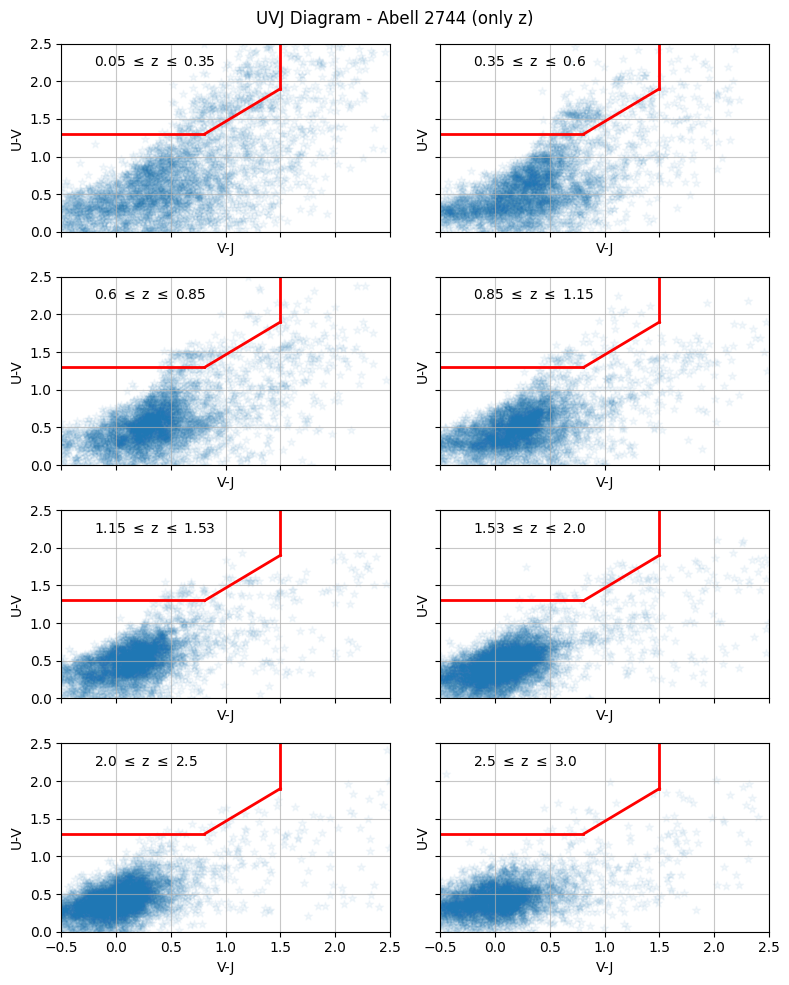

1

In [113]:
plot_df_subsets(zs, cut='only z')

## Magnitude

In [70]:
mag_f200_unmasked = np.where(mag_f200.mask, -1, mag_f200.data)
df['mag'] = mag_f200_unmasked 

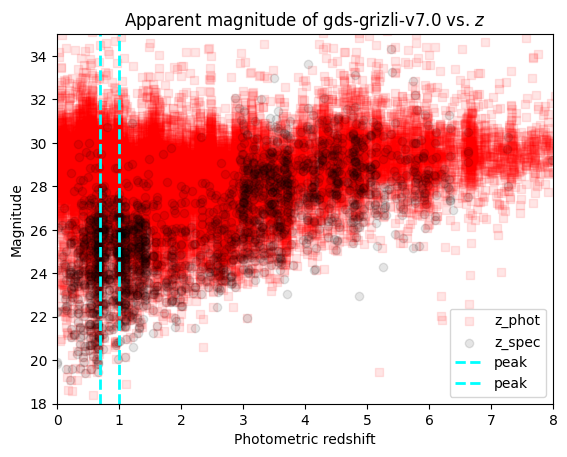

In [76]:
plt.scatter(zout['z_phot'], mag_f200, marker='s', alpha=0.1, label='z_phot', color='red')
plt.scatter(zout['z_spec'], mag_f200, marker='o', alpha=0.1, label='z_spec', color='black')
plt.title(f'Apparent magnitude of {field} vs. $z$')
plt.ylabel('Magnitude'); plt.xlabel('Photometric redshift')

plt.xlim(0, 8); plt.ylim(18, 35)
plt.axvline(0.7, color='cyan', linestyle='--', linewidth=2, label='peak')
plt.axvline(1, color='cyan', linestyle='--', linewidth=2, label='peak')
plt.legend()

In [89]:
# Creating dataframes for different ranges of magnitude (on top of redshift)
ms = []

for z in zs:
    m_cut = z[(z['mag'] >= 22) & (z['mag'] <= 28)]
    ms.append(m_cut)

for m in ms:
    print(len(m))

461
703
866
1078
1018
1354


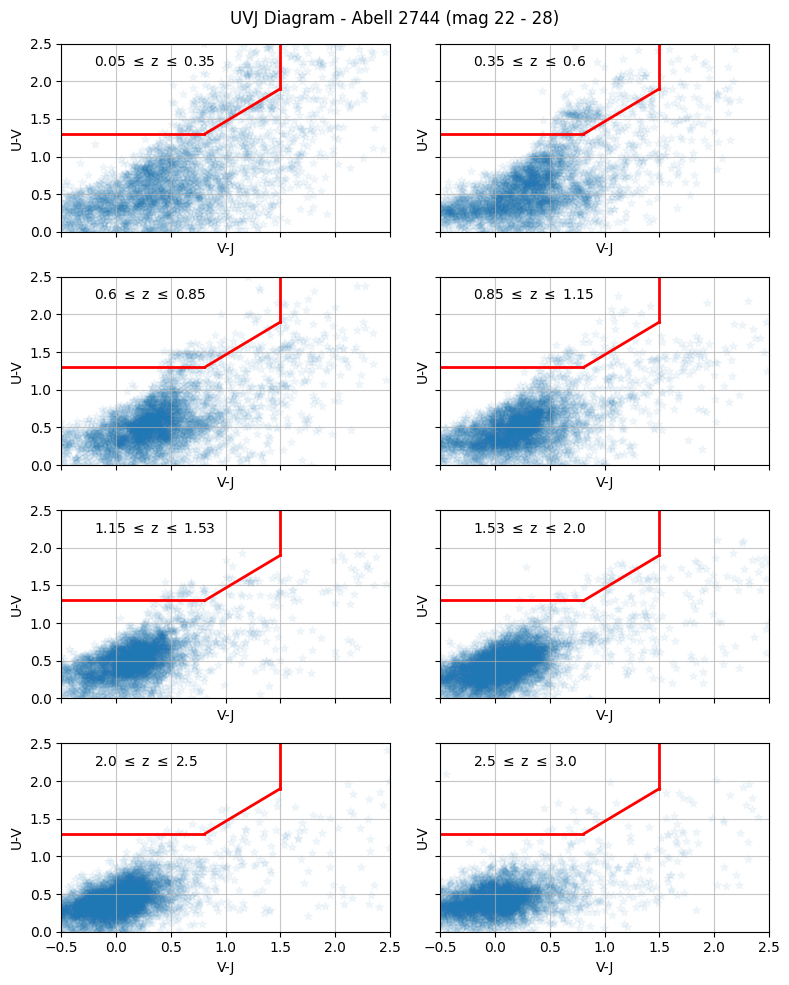

1

In [115]:
plot_df_subsets(ms, cut='mag 22 - 28')

## Luminosity function

0 9
1 11
2 18
3 22
4 33
5 51
6 52
7 53
8 58
9 68
10 69
11 81
12 82
13 95
14 100
15 119
16 129
17 151
18 221
19 222
20 261
21 263
22 274
23 275
24 276
25 286
26 303
27 311
28 319
29 322
30 326
31 327
32 330
33 352
34 366
35 375
36 388
37 389
38 390
39 391
40 401
41 424
42 434
43 469
44 479
45 484
46 493
47 511
48 520
49 537
50 555
51 556
52 560
53 577
54 590
55 618
56 634
57 636
58 643
59 648
60 649
61 654
62 670
63 690
64 724
65 734
66 773
67 774
68 777
69 781
70 783
71 786
72 790
73 797
74 806
75 840
76 867
77 878
78 884
79 890
80 892
81 896
82 940
83 948
84 949
85 975
86 985
87 992
88 1004
89 1013
90 1052
91 1069
92 1075
93 1078
94 1079
95 1096
96 1109
97 1129
98 1139
99 1140
100 1147
101 1152
102 1154
103 1157
104 1174
105 1190
106 1206
107 1208
108 1209
109 1215
110 1223
111 1224
112 1228
113 1235
114 1241
115 1245
116 1247
117 1249
118 1261
119 1305
120 1306
121 1316
122 1319
123 1320
124 1327
125 1339
126 1352
127 1355
128 1364
129 1384
130 1386
131 1414
132 1423
133 1434
134 144

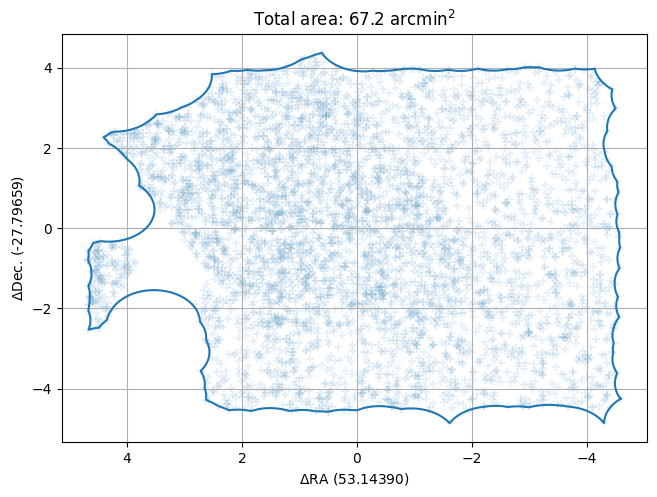

In [92]:
area, area_fig = grizli.utils.catalog_area(phot['ra'], phot['dec']) # square arcminutes

In [82]:
# Schechter function:
def schechter(mag, M_star=-21.9,a=-1.19,phi_star=11):
    func = 0.4*np.log(10) * phi_star * 10**(-0.4*(mag-M_star)*(a+1)) * np.exp(-10**(-0.4*(mag-M_star)))
    return func

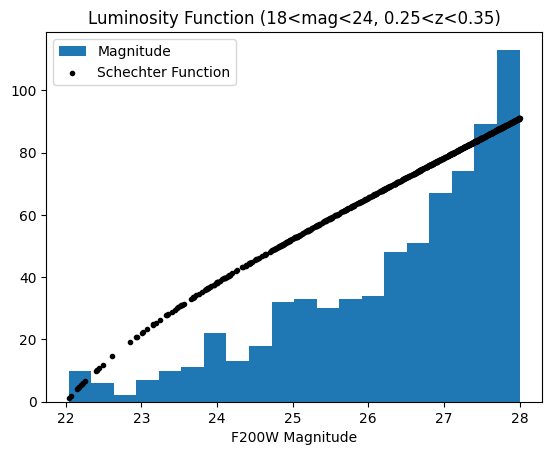

In [157]:
sch = schechter(ms[1]['mag'], M_star=22,a=-1.9,phi_star=3) # trial and error

plt.title('Luminosity Function (18<mag<24, 0.25<z<0.35)')
plt.hist(ms[1]['mag'], bins=20, label='Magnitude')
plt.scatter(ms[1]['mag'], np.log10(sch)*35, label='Schechter Function', color='k', marker='.')
plt.xlabel('F200W Magnitude')
plt.legend()